In [1]:
print("MOHIT JANGID")
print("18EJICS092")

MOHIT JANGID
18EJICS092


Q.1 Write and execute a User Interfacing Program (UIP) to apply the Naïve
Bayesian Classifier for News Articles classification, considering the
dataset given in .csv file (attachment). For the given objective, following
points are to be justified:

(a) Use any python supporting platform. Built in Python ML
Library/Modules can be used.

(b) Print your name and roll no. using a suitable instruction.

(c) Read the dataset by using a suitable file path.

(d) Segregate the Training and Testing data set in ratio of 72% and 28%
respectively.

(e) Print the correct and wrong predictions.

(f) Print the confusion matrix.

(g) Compute the Accuracy, Precision and Recall.

(h) Apply a suitable method to improve the accuracy.

(i) Print a conclusion comment.

(j) Submit only the .ipynb program files (which displays the output
also) as answer for this question. Write-up in answer-sheet is not
required.


In [2]:
import pandas as pd 
import numpy as np

In [3]:
df=pd.read_csv("Q1_dataset.csv")

In [4]:
print(df)

   Document         K1         K2          K3         K4          K5  \
0        D1      virus      china    covaxine      death   isolation   
1        D2    vaccine      virus  covishield    recover        case   
2        D3      india   positive       china       slot      active   
3        D4     active   medicine       virus   positive    lockdown   
4        D5      china  covaxcine     economy       test  covishield   
5        D6  isolation     people     vaccine    recover    lockdown   
6        D7       test     active     student      virus  covishield   
7        D8        bat        fit     batsman       rest      ground   
8        D9    healthy       ball     morning     sachin      oneday   
9       D10     ground       play     healthy      dhoni     batsman   
10      D11      dhoni        bat      ground       test      oneday   
11      D12     oneday       team        play        fit         cup   
12      D13      dhoni     ground      trophy     sachin        

In [5]:
# document wont contribute to model and will create a sparse matrix hence we drop document column
df.drop(["Document"],axis=1,inplace=True)

In [6]:
X=df.drop(["News Category"],axis=1)
y=df['News Category']

In [7]:
X=pd.get_dummies(X)

In [8]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y=le.fit_transform(y)

In [9]:
print(y)

[0 0 0 0 0 0 0 2 2 2 2 2 2 2 1 1 1 1 1 1 1]


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.28, random_state=42)

In [20]:
print("X_shape",X.shape)
print("y_shape",y.shape)
print("X_train_shape",X_train.shape)
print("y_train_shape",y_train.shape)
print("X_test_shape",X_test.shape)
print("y_test_shape",y_test.shape)

X_shape (21, 92)
y_shape (21,)
X_train_shape (15, 92)
y_train_shape (15,)
X_test_shape (6, 92)
y_test_shape (6,)


In [11]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB()
gnb.fit(X_train, y_train)


GaussianNB()

In [13]:
y_pred = gnb.predict(X_test)

In [24]:
print(y_pred)

[0 1 0 0 2 0]


In [26]:
#Print the correct and wrong predictions.
print("Number of mislabeled points out of a total %d points : %d"% (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 6 points : 1


In [32]:
#(f) Print the confusion matrix.
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
print(cm)

[[3 0 0]
 [1 1 0]
 [0 0 1]]


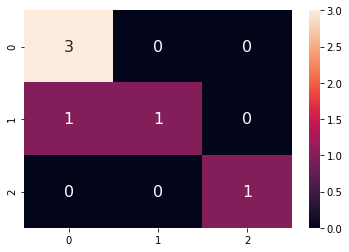

In [31]:
import seaborn as sn
sn.heatmap(cm, annot=True, annot_kws={"size": 16})

In [34]:
from sklearn.metrics import accuracy_score
print("ACCURACY SCORE IS:")
accuracy_score(y_test, y_pred)

ACCURACY SCORE IS:


0.8333333333333334

In [36]:
from sklearn.metrics import recall_score
print("RECALL")
recall_score(y_test, y_pred, average='macro')

RECALL


0.8333333333333334

In [40]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred, average='macro')

0.9166666666666666

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.50      0.67         2
           2       1.00      1.00      1.00         1

    accuracy                           0.83         6
   macro avg       0.92      0.83      0.84         6
weighted avg       0.88      0.83      0.82         6



In [69]:
#(h) Apply a suitable method to improve the accuracy.

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()

# Hyperparameter Optimization
parameters = {'n_neighbors': [3, 4, 5, 10], 
              'weights': ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'leaf_size' : [10, 20, 30, 50]
             }

grid_obj = GridSearchCV(knn, parameters)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the knn to the best combination of parameters
knn = grid_obj.best_estimator_

knn.fit(X_train,y_train)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


KNeighborsClassifier(leaf_size=10, n_neighbors=3, weights='distance')

In [70]:
pred=knn.predict(X_test)

In [71]:
accuracy_score(y_test, pred)

0.8333333333333334

In [72]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.50      0.67         2
           2       1.00      1.00      1.00         1

    accuracy                           0.83         6
   macro avg       0.92      0.83      0.84         6
weighted avg       0.88      0.83      0.82         6

